# **Heart disease prediction**

### To Build a machine learning model to predict the heart disease presence

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import

In [9]:
data = pd.read_csv("/content/heart_cleveland_upload.csv")
data = pd.DataFrame(data)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


Basic analysis like shape of the dataset, number of null values, duplicated values and Statistical summary of the data

In [3]:
print(data.shape)

(297, 14)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
print("Data with null values: ",data.isnull().sum())

Data with null values:  age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [12]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


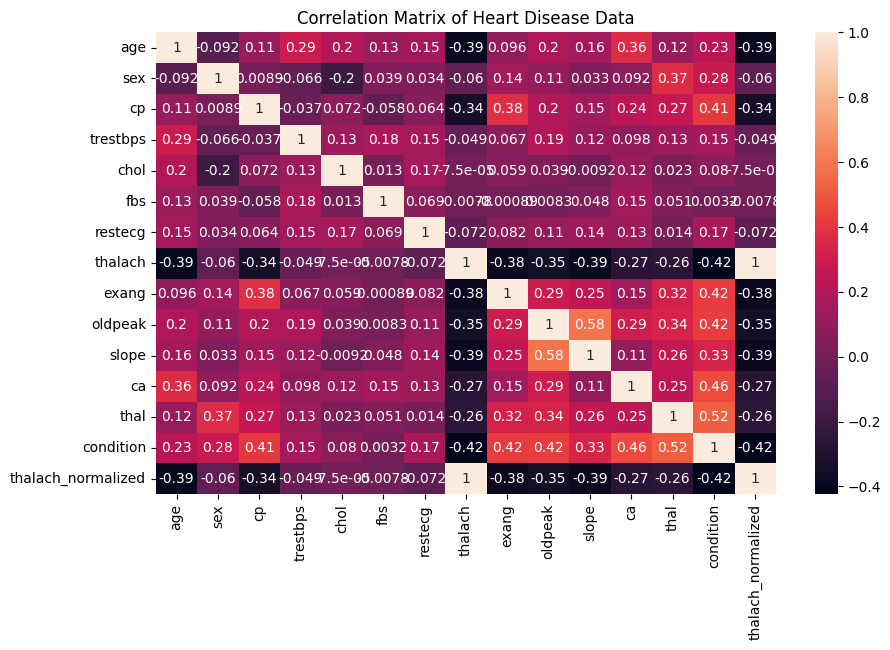

In [96]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix of Heart Disease Data')
plt.show()

# **Observation**
### From the correlation analysis , the columns such as cp,thalach, exang, oldpeak, slope, ca, thal have high correlation and thalach have negative correlation

### So for training the model , we don't need to cover all columns instead these are all enough to build a robust heart diseases prediction but Even though some features like sex,age are also needed to consider , so it is like we are going to build models for both cases like all features and main features and compares , that's it

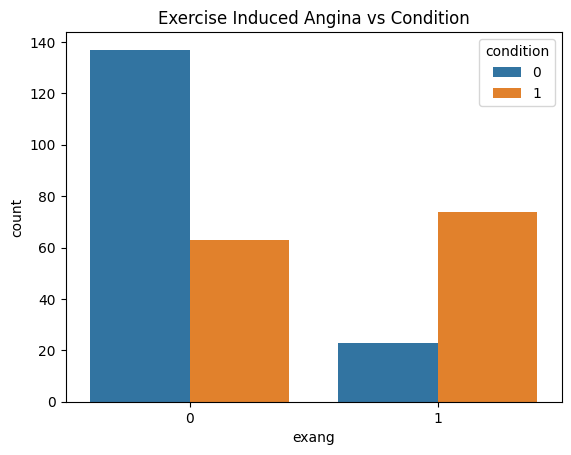

In [23]:
plt.figure()
sns.countplot(x='exang', hue='condition', data=data)
plt.title("Exercise Induced Angina vs Condition")
plt.show()


In [24]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [25]:
important_features = ["cp","thalach","exang","oldpeak","thal"]

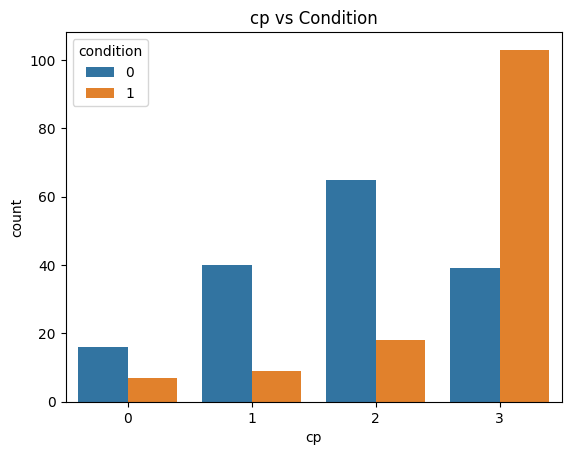

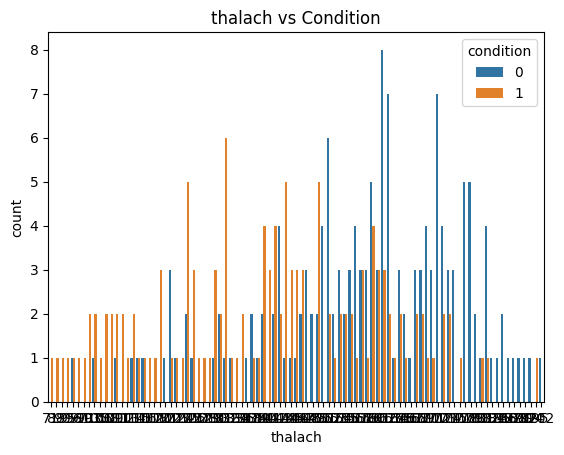

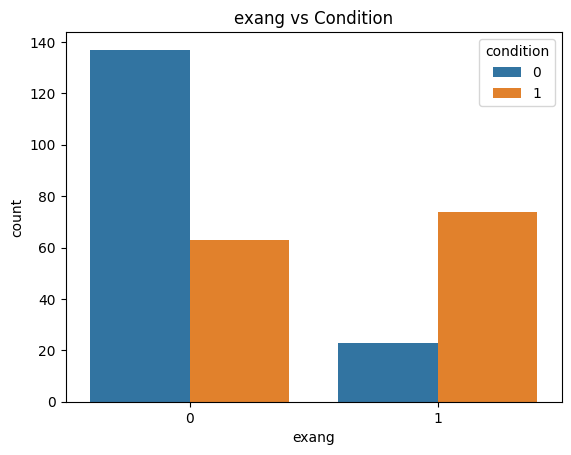

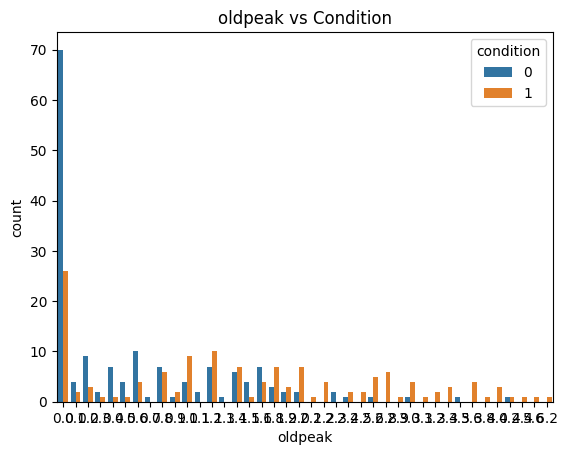

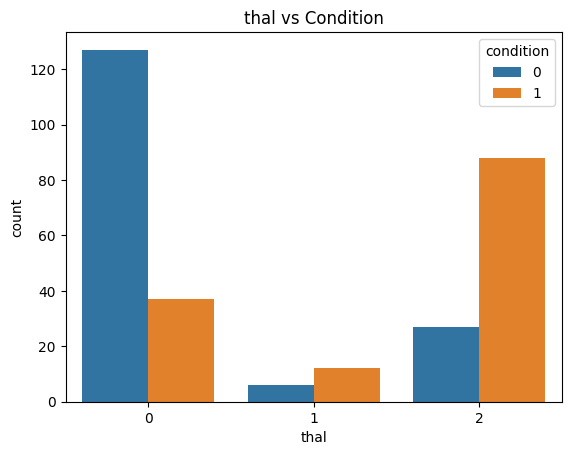

In [26]:
for feature in important_features:
  plt.figure()
  sns.countplot(x=feature, hue='condition', data=data)
  plt.title(f"{feature} vs Condition")
  plt.show()

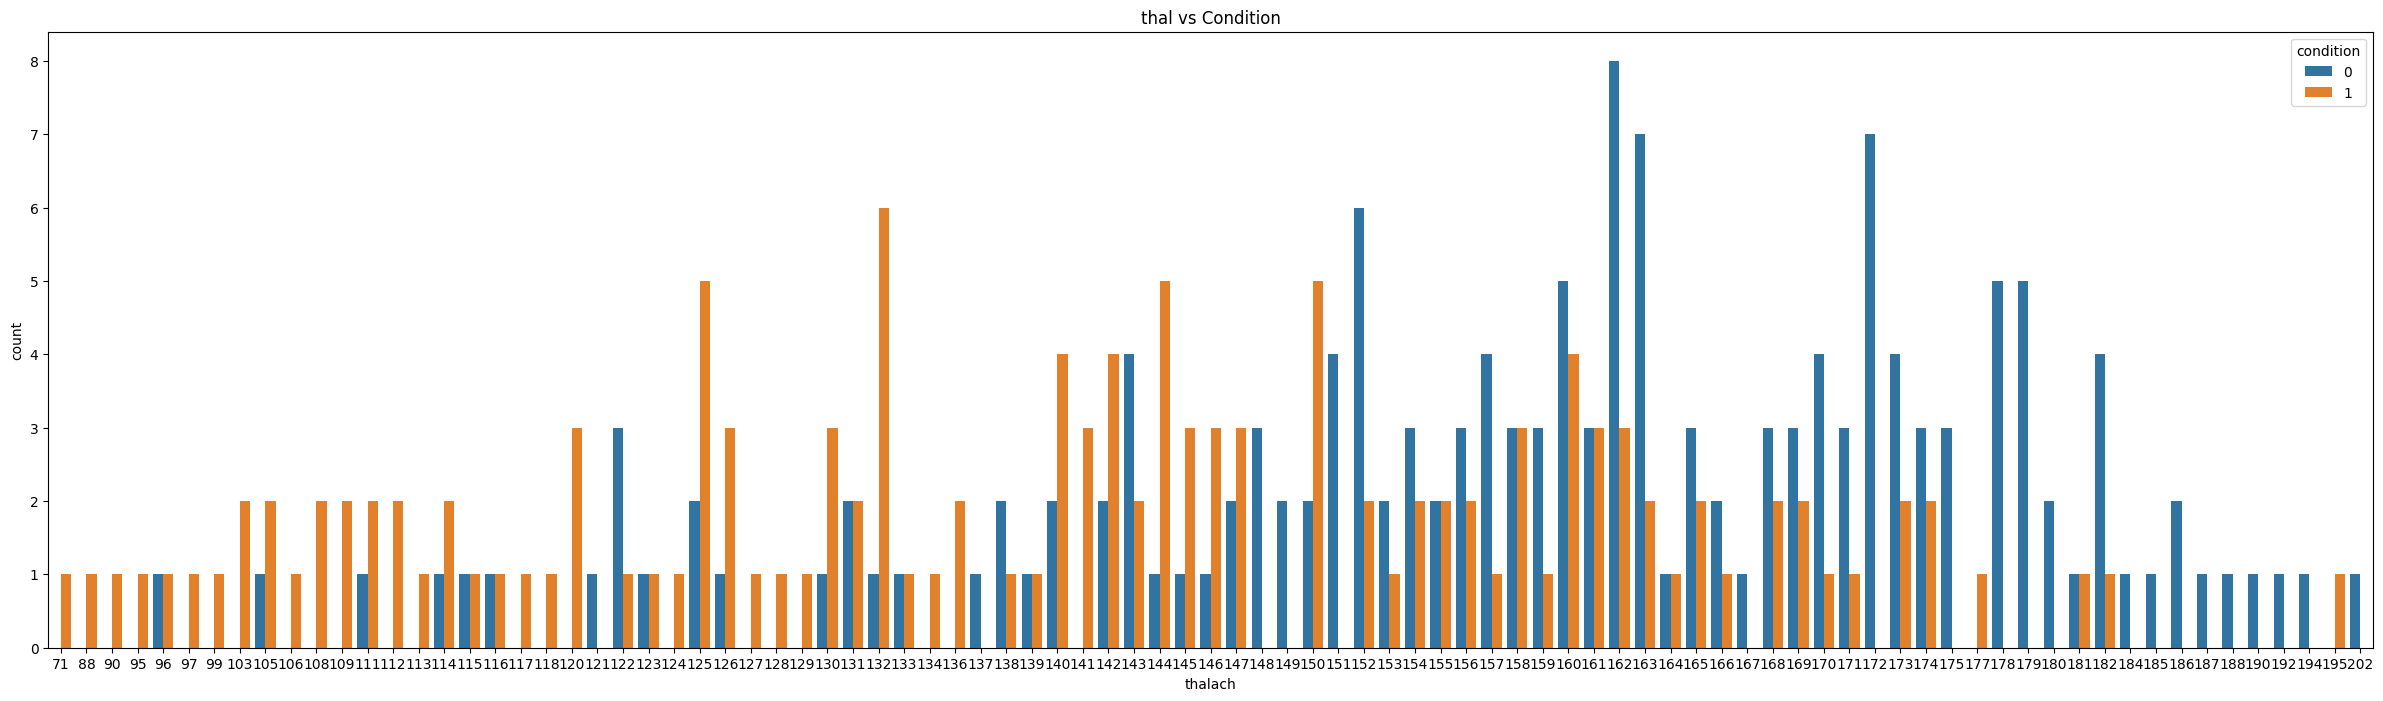

In [29]:
plt.figure(figsize=(30,8))
sns.countplot(x='thalach', hue='condition', data=data)
plt.title(f"{feature} vs Condition")
plt.show()

### From thalach (maximum heartbeat received ) we came to know that less beats leads to heart attacks

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data["thalach_normalized"] = scaler.fit_transform(data[["thalach"]])
print(data[["thalach", "thalach_normalized"]].head())


   thalach  thalach_normalized
0      131            0.458015
1      151            0.610687
2      114            0.328244
3      174            0.786260
4      144            0.557252


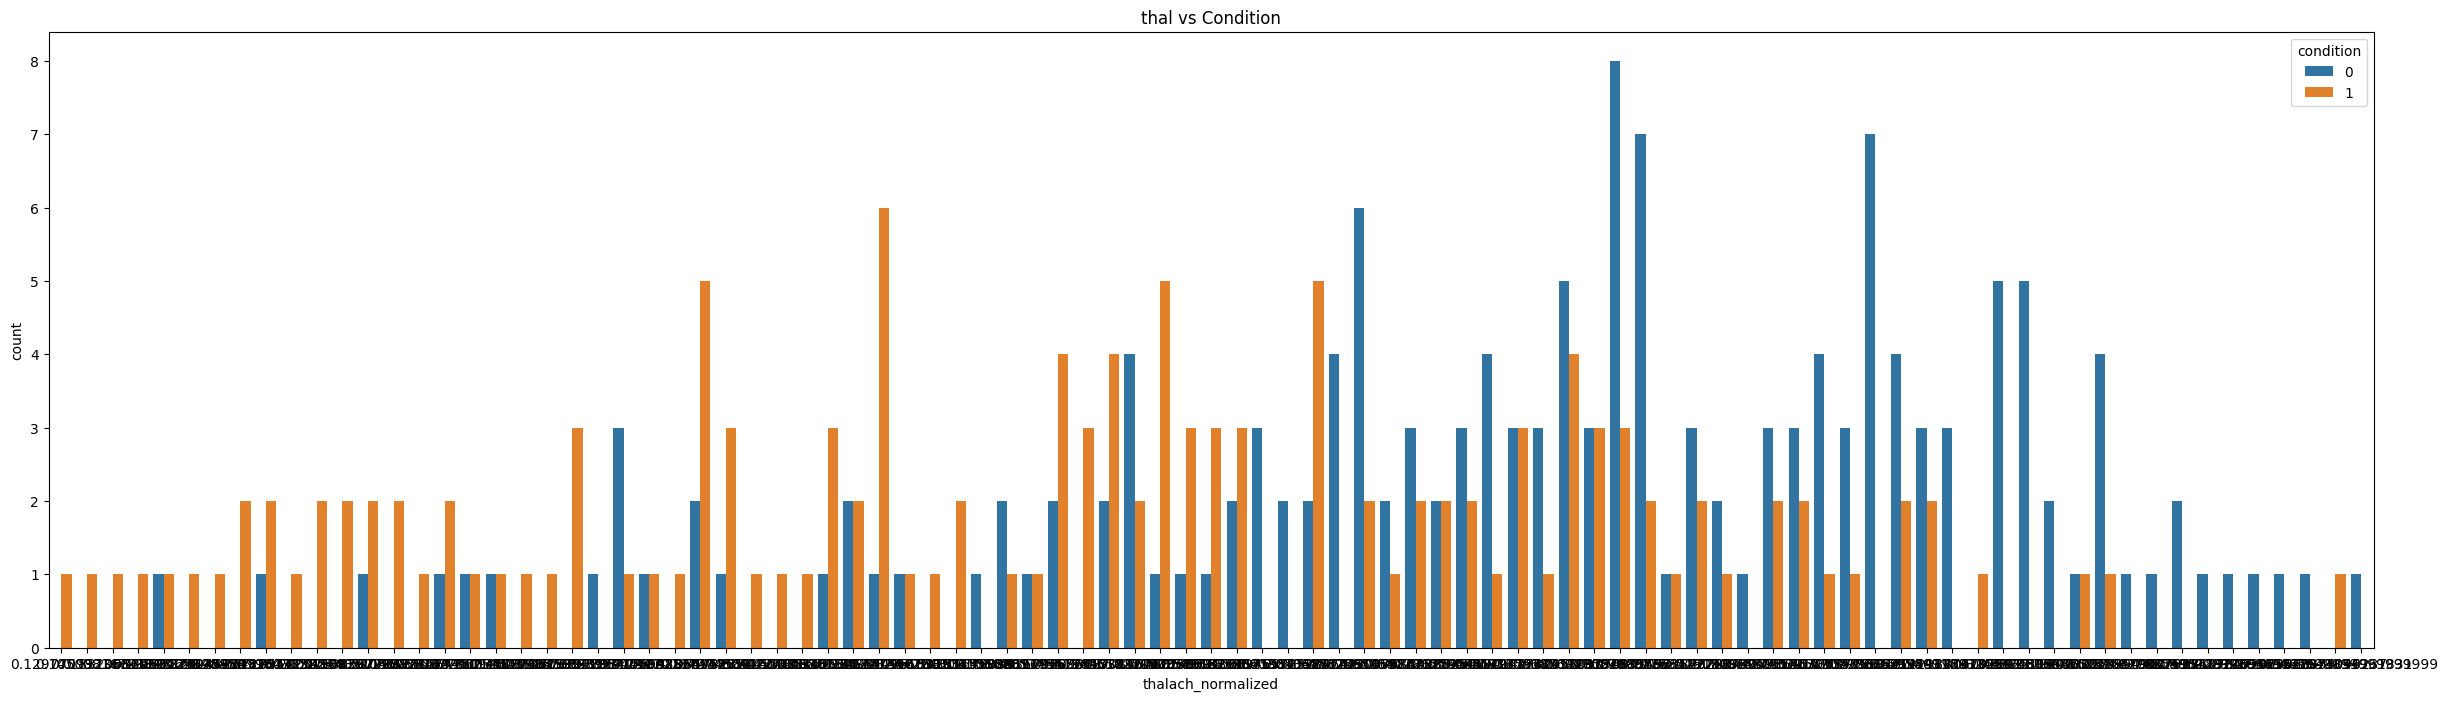

In [37]:
plt.figure(figsize=(30,8))
sns.countplot(x='thalach_normalized', hue='condition', data=data)
plt.title(f"{feature} vs Condition")
plt.show()

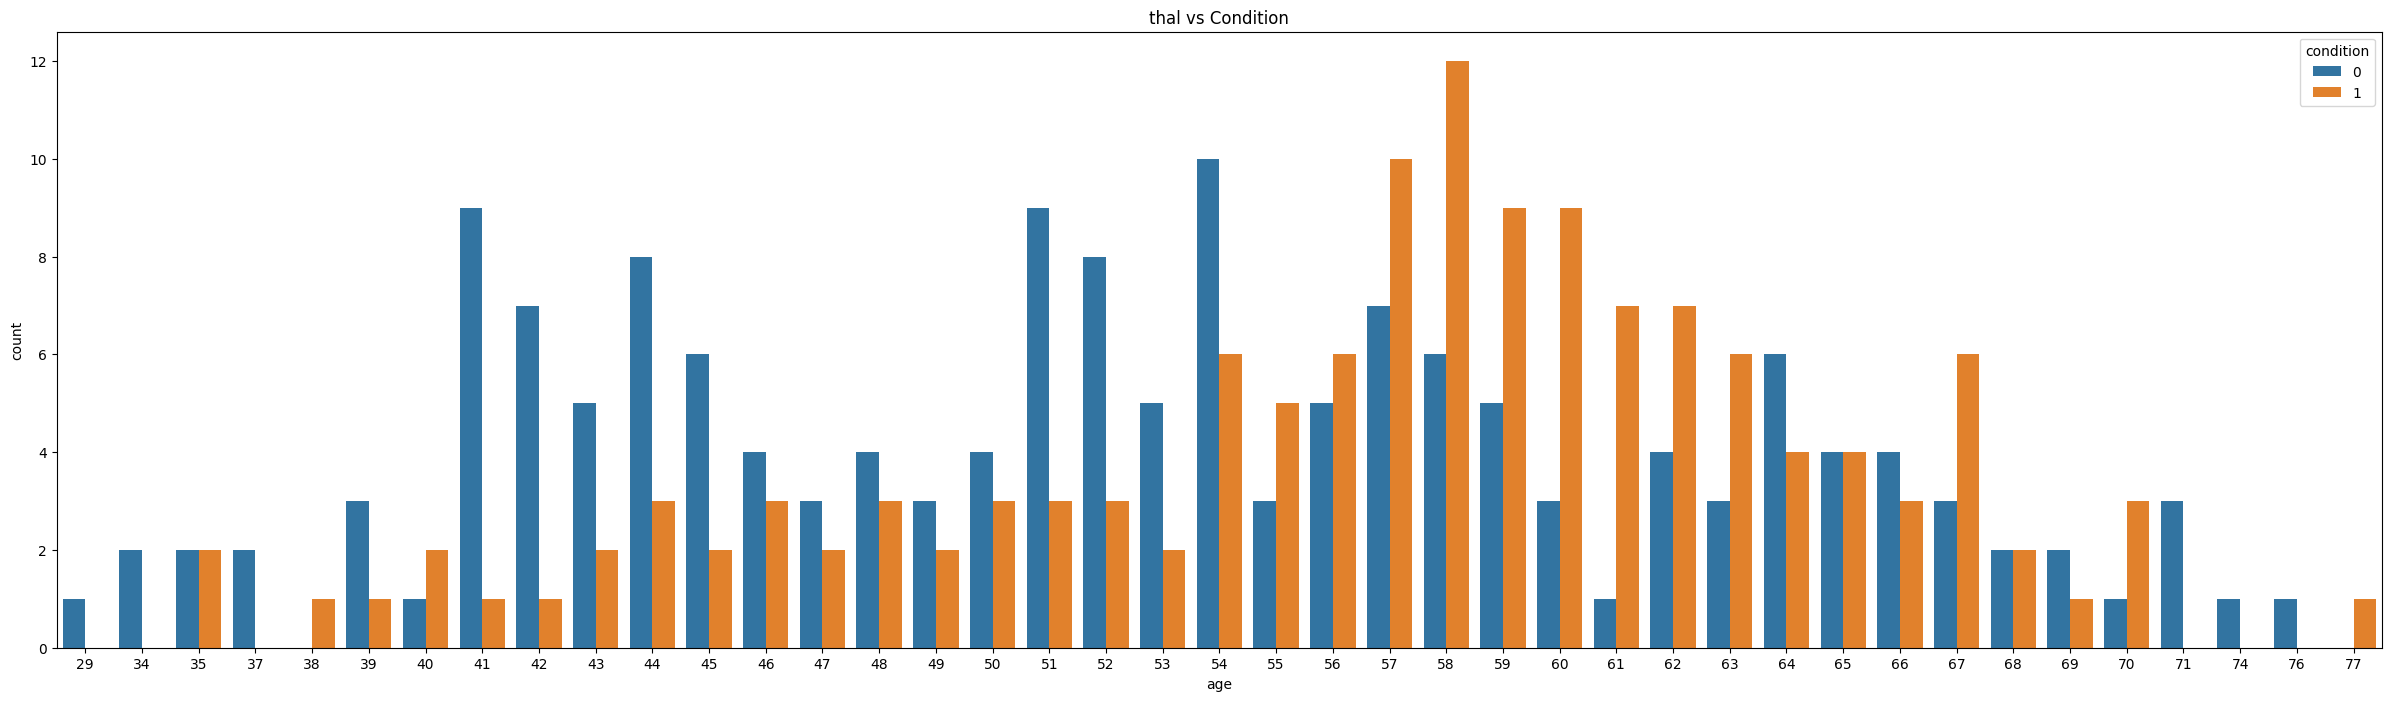

In [38]:
plt.figure(figsize=(30,8))
sns.countplot(x='age', hue='condition', data=data)
plt.title(f"{feature} vs Condition")
plt.show()

## Random Forest

In [75]:
from sklearn.model_selection import train_test_split

X = data.drop("condition", axis=1)
Y = data["condition"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=42)

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=250,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=42)

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7333333333333333

Confusion Matrix:
 [[23  9]
 [ 7 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [79]:
Xx = data[important_features]
yy = data["condition"]


In [81]:
# this is for reference
Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, yy,test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=150,
        random_state=42
        )

rf.fit(Xx_train, yy_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rf.predict(Xx_test)

print("Accuracy:", accuracy_score(yy_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(yy_test, y_pred))
print("\nClassification Report:\n", classification_report(yy_test, y_pred))

Accuracy: 0.7666666666666667

Confusion Matrix:
 [[24  8]
 [ 6 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



In [91]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)




/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [85]:
# this is for reference

Xx = data[important_features]
yy = data["condition"]

Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, yy,test_size=0.2,random_state=42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(Xx_train, yy_train)

from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(Xx_test)

print("Accuracy:", accuracy_score(yy_test, y_pred))
print("\nClassification Report:\n", classification_report(yy_test, y_pred))



Accuracy: 0.7166666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73        32
           1       0.69      0.71      0.70        28

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



### From this we can conclude that
### Random Forest : **Accuracy:0.7333333333333333**
### Logistic Regression : **Accuracy :0.7166666666666667**

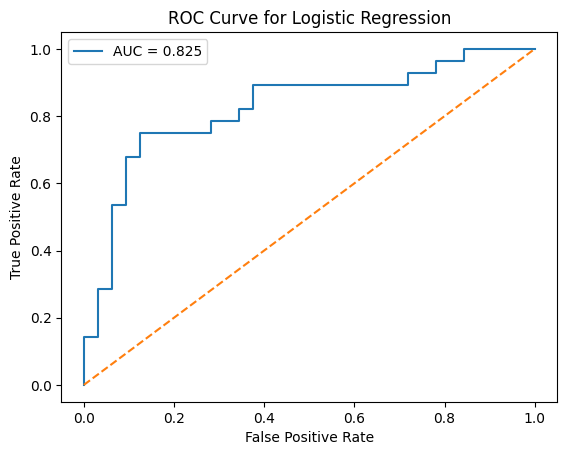

AUC Score: 0.8247767857142857


In [94]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_prob = model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()

print("AUC Score:", roc_auc)


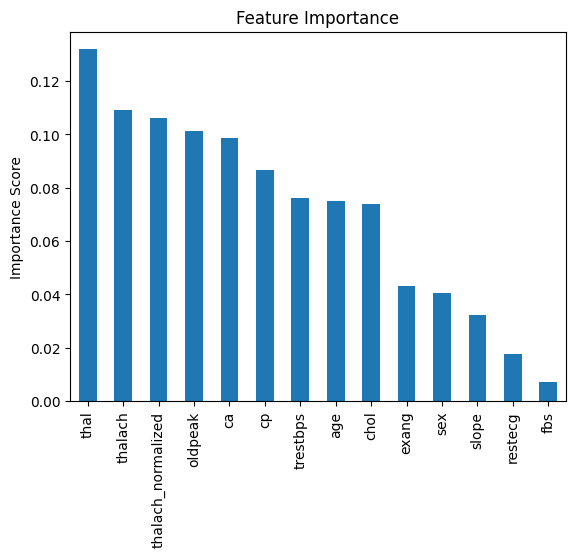

In [95]:
import pandas as pd


importance = rf.feature_importances_


feature_importance = pd.Series(importance, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure()
feature_importance.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()


# **Final Conclusion**

From these we can infer that that thal-thalasemmia and thalach-maximum heart beat received plays a major role in heart attack